# 1. 해시

## 1-1. 완주하지 못한 선수
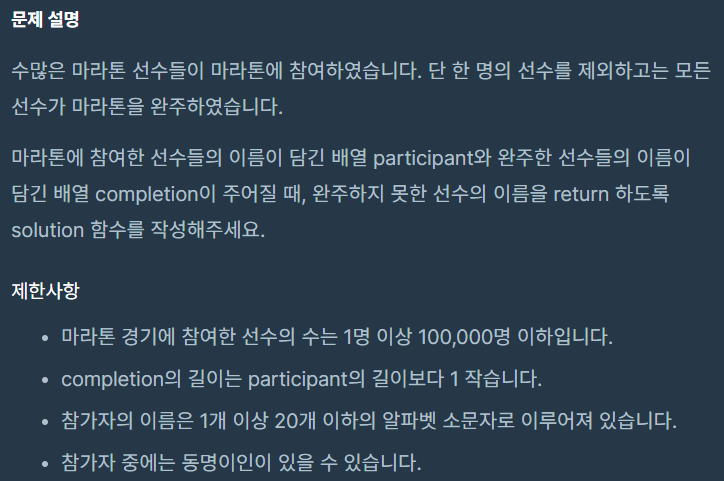

### 내 풀이

In [4]:
def solution(participant, completion):
    # 참가자 딕셔너리 {'참가자 이름':'참가한 인원 수'}
    part = {}
    for p in participant:
        part[p] = 0
    for p in participant:
        part[p] += 1
        
    # 참가자 딕셔너리에서 완주자 이름을 확인하며 인원 수 - 1
    for c in completion:
        part[c] -= 1
    
    # 참가자 딕셔너리 값이 0이 아닌 경우 완주하지 못한 것
    for p in participant:
        if part[p] != 0:
            answer = p
            return answer

### 상위 풀이 1
- counter 객체 사용

In [ ]:
import collections

def solution(participant, completion):
    answer = collections.Counter(participant) - collections.Counter(completion)
    return list(answer.keys())[0]

In [5]:
import collections

temp = ['a', 'b', 'c', 'a', 'c']
collections.Counter(temp)

Counter({'a': 2, 'b': 1, 'c': 2})

### 상위 풀이 2
- 해시함수 사용
- hash 값은 key마다 달라지게 된다

In [8]:
def solution(participant, completion):
    answer = ''
    temp = 0
    dic = {}
    for part in participant:
        dic[hash(part)] = part
        temp += hash(part)
    for com in completion:
        temp -= hash(com)
    answer = dic[temp]
    
    return answer

In [11]:
dic = {}
participant = ['lee', 'da', 'hye']
for part in participant:
    dic[hash(part)] = part
print(dic)

{8433811340968751058: 'lee', 1392638181247692154: 'da', -7932980492041655044: 'hye'}


### 상위 풀이 3

In [ ]:
def solution(participant, completion):
    participant.sort()
    completion.sort()
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
    # 동명이인이 맨 마지막에 있는 경우 
    return participant[len(participant)-1]

## 1-2. 전화번호 목록
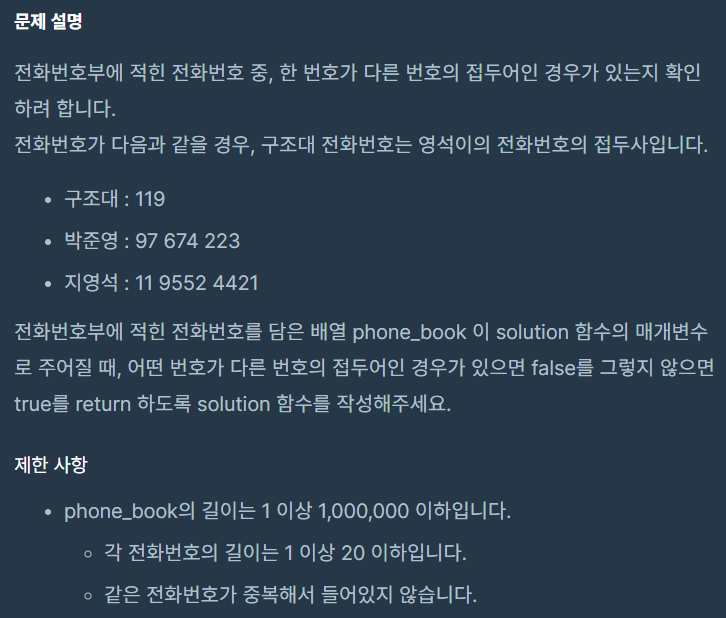

### 내 풀이
- sort 함수에서 시간 복잡도가 높은듯

In [21]:
def solution(phone_book):
    answer = True
    phone_book.sort()
    for i in range(0, len(phone_book) - 1):
        temp = len(phone_book[i])
        if phone_book[i] == phone_book[i + 1][:temp]:
            answer = False
            break
    return answer

### 상위 코드 1
- 딕셔너리 이용

In [22]:
def solution(phone_book):
    answer = True
    hash_map = {}
    for phone_number in phone_book:
        hash_map[phone_number] = 1
        
    for phone_number in phone_book:
        temp = ""
        for number in phone_number:
            temp += number
            if temp in hash_map and temp != phone_number:
                answer = False
                return answer
    return answer

## 1-3. 위장
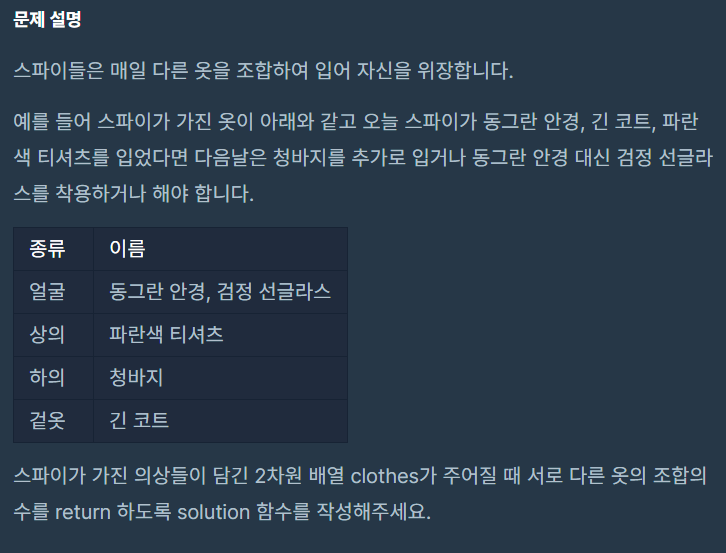

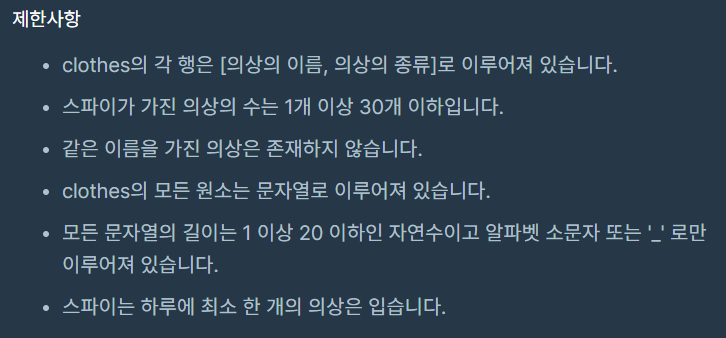

### 상위 코드 1
- (의상종류 + 1)을 모두 곱한 후 - 1 (하나는 반드시 선택해야 하므로) 
- counter 객체
- reduce
    - reduce(집계 함수, 순회 가능한 데이터, 초기값)
    - 집계 함수는 두개의 인자를 받음
    - 첫번째 인자는 누적자(accumulator), 두번째 인자는 현재값(current value)이 순회 가능한 데이터에서 넘어옴
    - 누적자에 집계 함수에서 처리된 현재값이 계속 업데이트

In [22]:
def solution(clothes):
    from collections import Counter
    from functools import reduce
    
    cnt = Counter([kind for name, kind in clothes])
    answer = reduce(lambda acc, cur: acc * (cur + 1), cnt.values(), 1) - 1
    return answer

In [23]:
clothes = [['sunglasses', 'eyewear'], ['glasses', 'eyewear'], ['bucket_hat', 'headgear']]
cnt = Counter([kind for name, kind in clothes])
cnt

Counter({'eyewear': 2, 'headgear': 1})

In [24]:
cnt.values()

dict_values([2, 1])

## 1-4. 베스트앨범
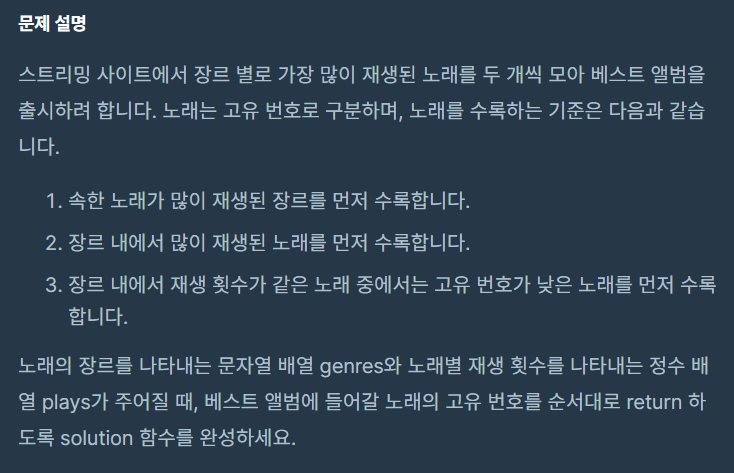

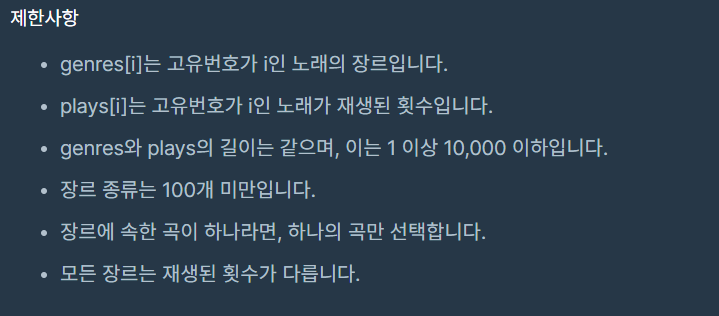

### 내 풀이
- 딕셔너리 정렬하기 
- sort, sorted 잘 알아둘 것

In [67]:
import operator

def solution(genres, plays):
    answer = []

    genres_dict = {} # genre를 키로, (재생 수, 곡 번호)리스트를 원소로 가짐
    genres_count = {} # genre를 키로, 장르 재생 수를 원소로 가짐
    for idx, info in enumerate(zip(genres, plays)):
        g, p = info
        if g not in list(genres_dict.keys()):
            genres_dict[g] = []
            genres_count[g] = 0
        genres_dict[g].append((p, idx))
        genres_count[g] += p
    
    # 속한 노래가 많이 재생된 장르 내림차순 정렬
    sdict = sorted(genres_count.items(), key=lambda x: -x[1])    
    for g, p in sdict:
         # 장르 내 포함된 곡의 재생 수 기준 내림차순 정렬, 재생 수가 같을 경우 고유번호가 작은 것이 먼저(오름차순)
        temp = sorted(genres_dict[g], key=lambda x : (-x[0], x[1]))
        for i in [0, 1]:
            answer.append(temp[i][1])
            if len(temp) == 1:
                break
    
    return answer

[4, 1, 3, 0]


# 2. 스택/큐

## 2-1. 다리를 지나는 트럭

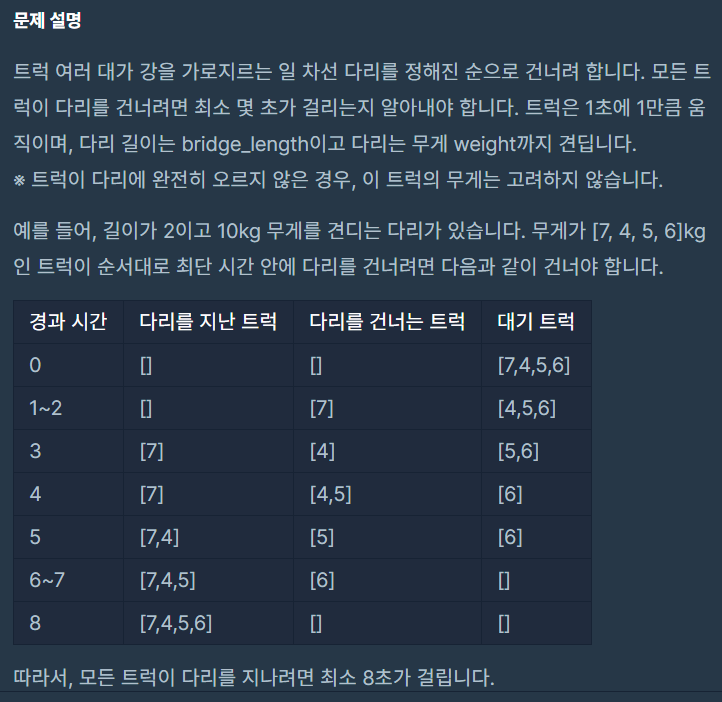

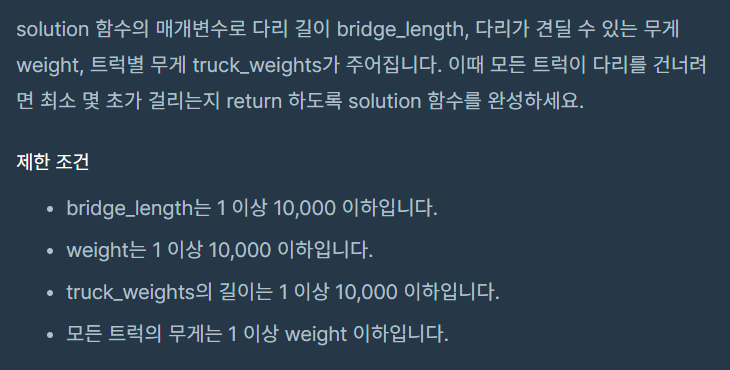

### 내 풀이
- queue로 다리 구현
- 매번 sum(deque)가 시간 초과의 원인이었음 -> weight_sum 변수로 무게 합 관리

In [187]:
from collections import deque

def solution(bridge_length, weight, truck_weights):
    
    # 내림차순 정렬 후 가장 왼쪽(가장 무거운 트럭) 원소부터 다리에 올림
    queue = deque([0] * (bridge_length))
    
    weight_sum = 0
    i = 0
    answer = 1
    queue.popleft()
    queue.append(truck_weights[i])
    weight_sum += truck_weights[i]
    
    # 다리 위 남은 트럭이 한 대도 없어야 종료
    while weight_sum > 0:
        # 마지막 남은 트럭인지 검사
        if i == len(truck_weights) - 1:
            last = queue.popleft()
            weight_sum -= last
            queue.append(0)
            answer += 1
        
        else:
            last = queue.popleft()
            weight_sum -= last 
            
            # 다음 트럭이 올라갈 수 있는지(제한 무게를 초과하지 않는지) 검사
            if truck_weights[i + 1] + weight_sum <= weight:
                queue.append(truck_weights[i + 1])
                weight_sum += truck_weights[i + 1]
                answer += 1
                i += 1

            # 올라갈 수 없다면 한 트럭이 빠져나갈 때 까지 시간 대기
            else:
                queue.append(0)
                answer += 1
    return answer

In [188]:
solution(5, 5, [2, 2, 2, 2, 1, 1, 1, 1, 1])

deque([0, 0, 0, 0, 2])
deque([0, 0, 0, 2, 2])
deque([0, 0, 2, 2, 0])
deque([0, 2, 2, 0, 0])
deque([2, 2, 0, 0, 0])
deque([2, 0, 0, 0, 2])
deque([0, 0, 0, 2, 2])
deque([0, 0, 2, 2, 1])
deque([0, 2, 2, 1, 0])
deque([2, 2, 1, 0, 0])
deque([2, 1, 0, 0, 1])
deque([1, 0, 0, 1, 1])
deque([0, 0, 1, 1, 1])
deque([0, 1, 1, 1, 1])
deque([1, 1, 1, 1, 0])
deque([1, 1, 1, 0, 0])
deque([1, 1, 0, 0, 0])
deque([1, 0, 0, 0, 0])
deque([0, 0, 0, 0, 0])


19

## 2-2. 주식 가격
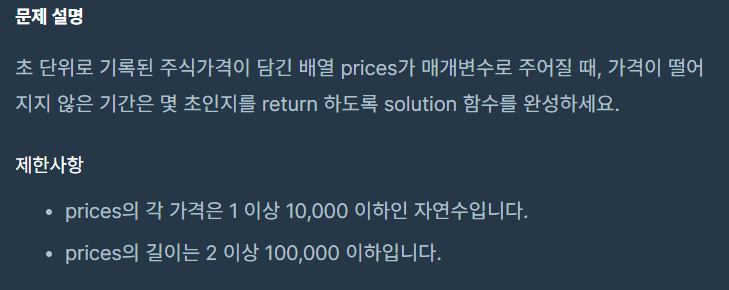

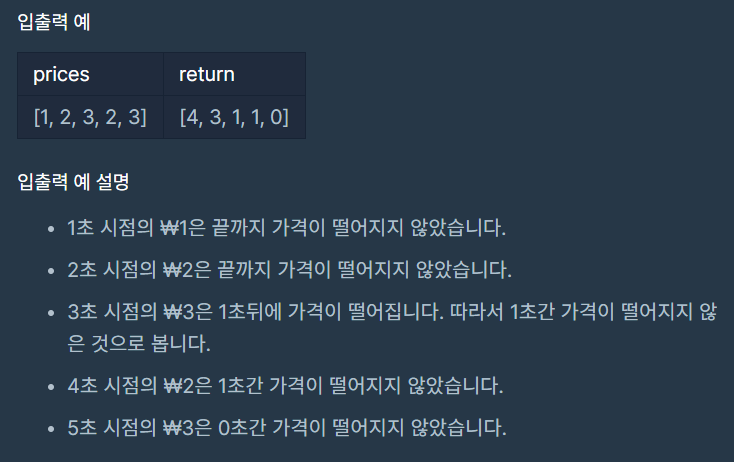

### 내 풀이

In [42]:
def solution(prices):
    answer = [0] * len(prices)

    for i, x in enumerate(prices):
        if x == 1:
            answer[i] = len(prices) - i - 1
            continue
            
        j = i
        while j < len(prices) - 1:
            answer[i] += 1
            if x > prices[j + 1]:
                break
            j += 1

    return answer

### 상위 코드 1
- 거의 비슷

In [ ]:
def solution(prices):
    answer = [0] * len(prices)
    
    for i in range(len(prices)):
        for j in range(i+1, len(prices)):
            if prices[i] <= prices[j]:
                answer[i] += 1
            else:
                answer[i] += 1
                break
                
    return answer

### 상위 코드 2
- 큐 사용
- 시간 복잡도는 같은듯

In [44]:
from collections import deque

def solution(prices):
    answer = []
    prices = deque(prices)
    while prices:
        c = prices.popleft()

        count = 0
        for i in prices:
            if c > i:
                count += 1
                break
            count += 1

        answer.append(count)

    return answer

## 2-3. 기능 개발
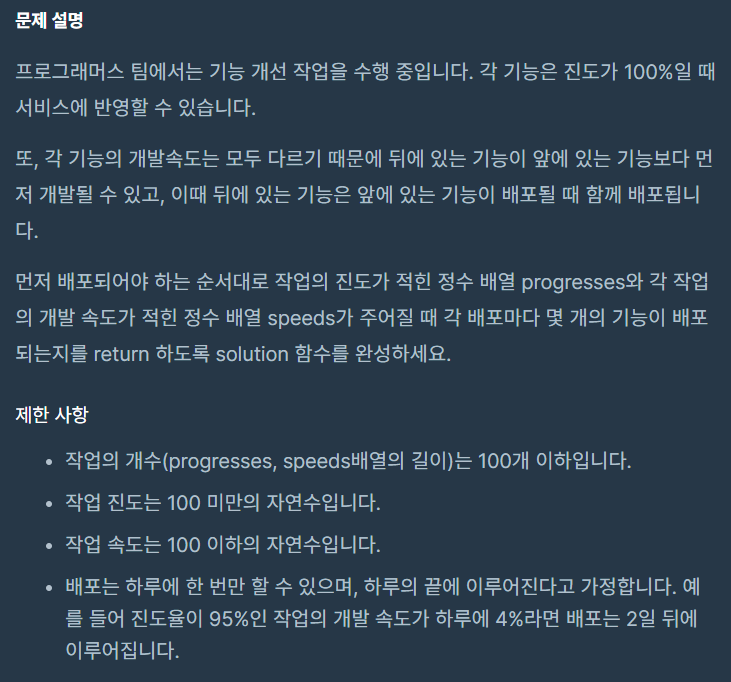

### 내 풀이
- 남은 작업량과 작업 속도로 각 작업당 남은 작업일수를 구함
- 큐에 넣어서 왼쪽 원소부터 하나씩 꺼내면서 뒤에 있는 작업의 작업일수와 비교
- 뒤에 있는 작업이 작업일수가 더 작은 경우 앞의 작업이 배포될 때 같이 배포
- 그렇지 않은 경우 큐에 다시 삽입

In [57]:
import math
from collections import deque

def solution(progresses, speeds):
    answer = []
    days_left = [0] * len(progresses)
    
    for idx, x in enumerate(zip(progresses, speeds)):
        p, s = x
        days_left[idx] = math.ceil((100 - p) / s) 
    
    queue = deque(days_left)
    while queue:
        max_days = queue.popleft()
        result = 1
        
        while queue:
            next_days = queue.popleft()
            if max_days >= next_days:
                result += 1
            else:
                queue.appendleft(next_days)
                answer.append(result)
                break
                
        if not queue:
            answer.append(result)
    
    return answer

### 상위 코드 1
- celi 안쓰고 음수 내림으로 올림 구현
    - (p - 100)은 음수, (p - 100) // s 하면 음수 내림, -(p - 100) // s 하면 양수를 올림한 것이 된다 
- 직관적으로 이해하기 어렵다 .. 

In [ ]:
def solution(progresses, speeds):
    Q = []
    for p, s in zip(progresses, speeds):
        # Q가 비었거나, 맨 뒤에 있는 원소가 현재 검사하는 작업의 작업일 수보다 작으면
        # max값이 바뀐 것이므로
        if len(Q) == 0 or Q[-1][0] < -((p - 100) // s):
            # [남은 작업일수, 1] 새로 append
            Q.append([-((p - 100) // s),1])
        else:
            Q[-1][1] += 1
            
    return [q[1] for q in Q]

In [63]:
(30 - 100) // 30

-3

### 상위 코드 2
- time으로 조건문 구성
- list pop이 비효율적이라고 함 .. 

In [ ]:
def solution(progresses, speeds):
    answer = []
    time = 0
    count = 0
    
    while len(progresses) > 0:
        if (progresses[0] + time * speeds[0]) >= 100:
            progresses.pop(0)
            speeds.pop(0)
            count += 1
        else:
            if count > 0:
                answer.append(count)
                count = 0
            time += 1
    
    answer.append(count)
    
    return answer

## 2-4. 프린터
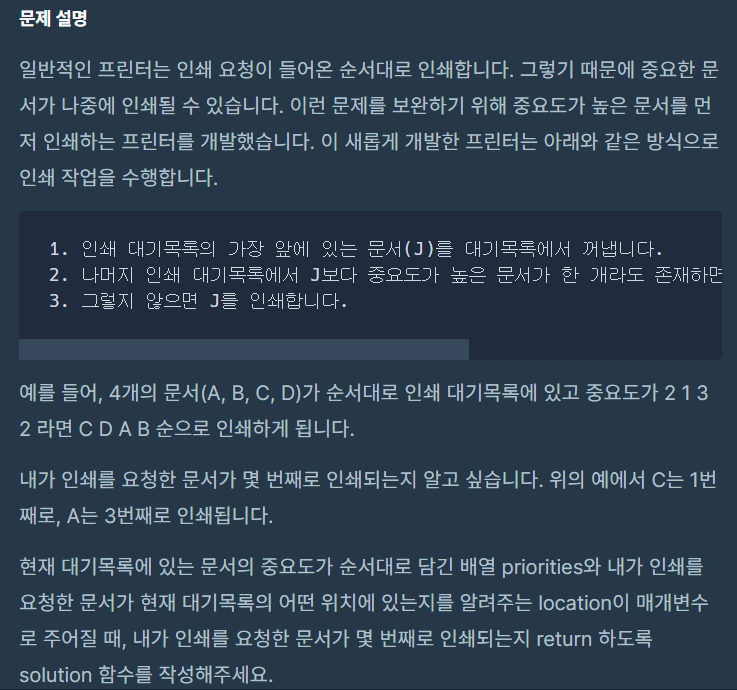
1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.

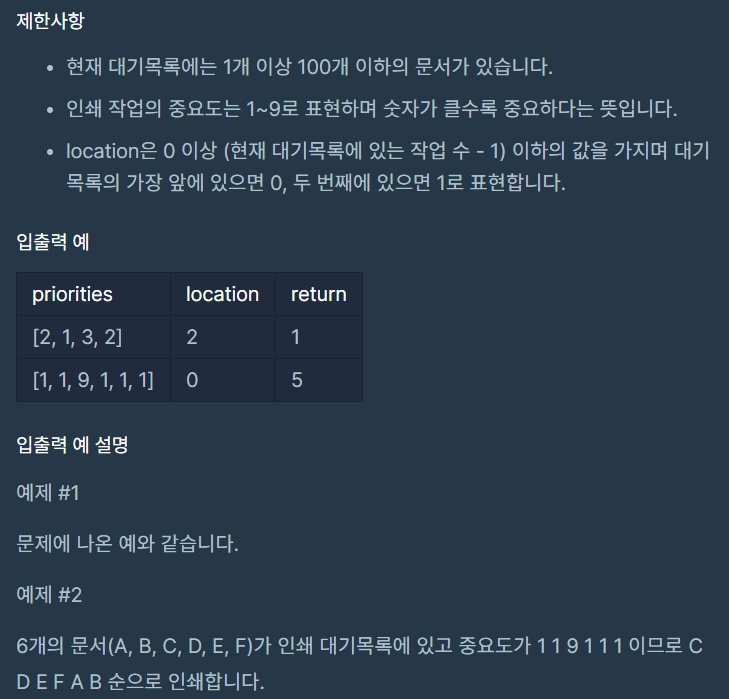

### 상위 풀이 1
- 풀이방법 알았는데 내 코드는 테케 통과가 엉망진창이었다
- 예외처리 잘 하자
- heapify 첨 알았음

In [ ]:
from heapq import heapify, heappop, heappush

def solution(scoville, K):
    heapify(scoville)
    count = 0
    
    while True:
        min1 = heappop(scoville)
        
        if min1 >= K:
            return count
        
        elif len(scoville) == 0:
            return -1
        
        min2 = heappop(scoville)
        count += 1
        heappush(scoville, min1 + min2 * 2)

# 3. 힙

## 3-1. 더 맵게
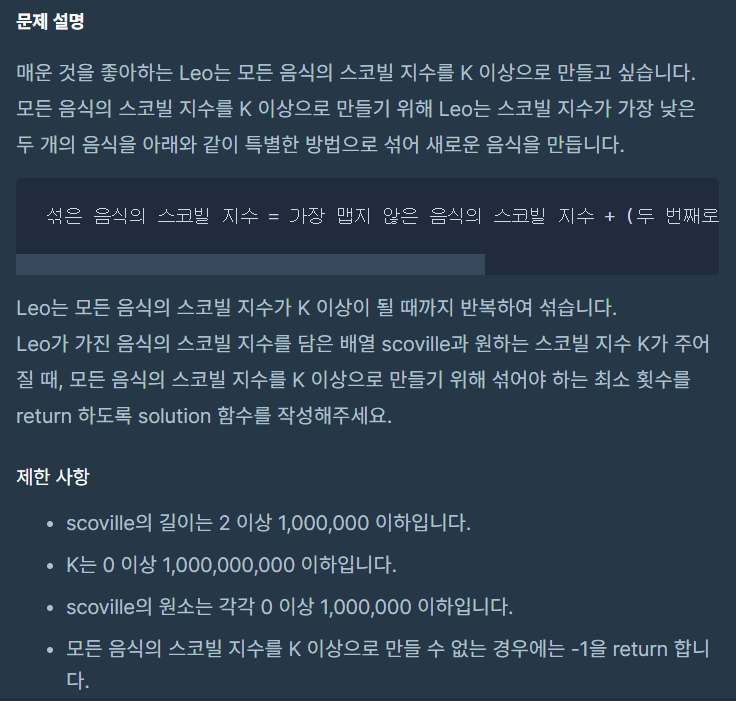

- 섞은 음식의 스코빌 지수 = 가장 맵지 않은 음식의 스코빌 지수 + (두 번째로 맵지 않은 음식의 스코빌 지수 * 2)

# 4. 정렬

## 4-1. K번째수

In [207]:
def solution(array, commands):
    answer = []
    for i, j, k in commands:
        answer.append(sorted(array[i - 1:j])[k - 1])
    return answer

## 4-2. 가장 큰 수
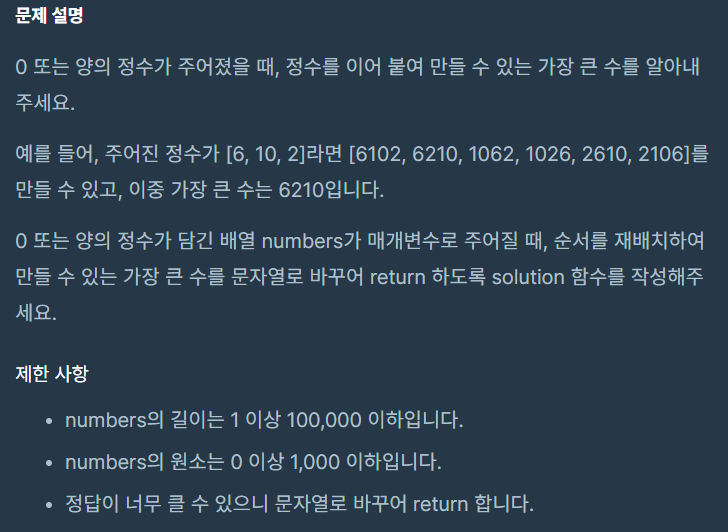

### 상위 풀이 1
- 조건에서 원소가 1000 이하라고 한 것을 사용
- 1이 111이하의 수보다 앞에 나와야 함
    1 110 > 110 1

In [226]:
def solution(numbers):
    numbers = list(map(str, numbers))
    numbers.sort(key=lambda x: x*3, reverse=True)
    return str(int(''.join(numbers)))

In [227]:
solution([3, 30, 34, 5, 9])

'9534330'

## 4-3. H-index
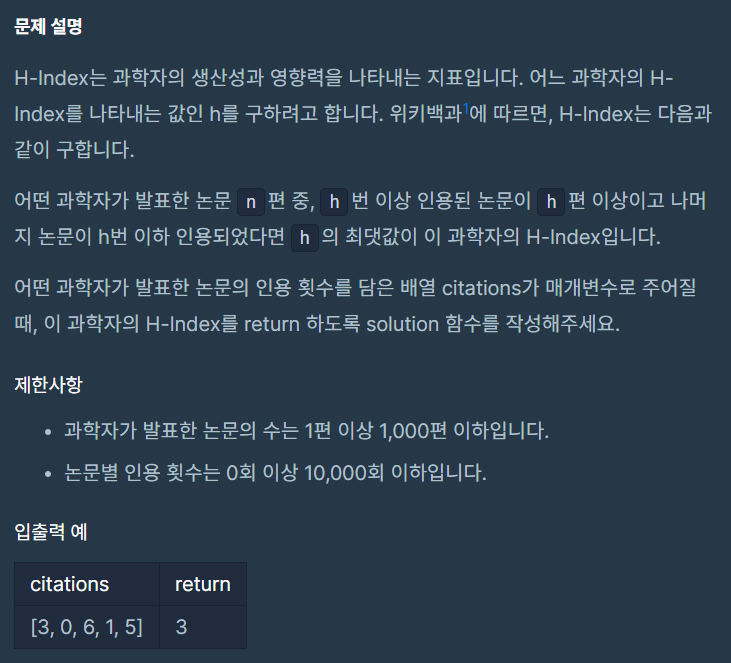

### 내 풀이
- 예외를 잘 생각해야..

In [253]:
def solution(citations):
    answer = 0
    citations = sorted(citations) # 오름차순 정렬
    
    temp_index = None # 정답 후보를 찾음
    for i in range(len(citations)):
        if citations[i] <= len(citations) - i:
            temp_index = i
            
    if temp_index != None: 
        if citations[temp_index] == 0: # 모든 원소가 0인 경우 예외 처리
            return 0
        
        # 이미 최댓값인 경우
        if citations[temp_index] == len(citations) - temp_index:
            answer = citations[temp_index]

        # 최댓값이 아닌 경우
        else:
            answer = citations[temp_index]
            # 값을 하나씩 늘려가며 조건을 만족하는지 확인
            while answer <= citations[temp_index + 1]:
                if answer == len(citations) - temp_index - 1:
                    break
                answer += 1

    else:
        answer = len(citations)
        
    return answer

### 상위 코드 1
- 오름차순 정렬 후
- 현재 체크하는 원소(h번 인용된 논문)와 뒤에 남아있는 개수(h번 이상 인용된 논문 수) 중 최댓값을 산정하는 기준이 무엇인지 잘 생각해보면 되는 문제 

In [261]:
def solution(citations):
    citations = sorted(citations)
    l = len(citations)
    for i in range(l):
        # 
        if citations[i] >= l - i: 
            return l - i # 현재 체크하는 원소를 포함해 뒤에 남아있는 개수를 리턴하면 됨
    return 0

### 상위 코드 2
- 이해가 안된다 ㅎㅎ 
- enumerate, map 공부

In [277]:
def solution(citations):
    citations.sort(reverse=True)
    answer = max(map(min, enumerate(citations, start=1)))
    return answer

In [280]:
citations = [22, 42]
solution(citations)

2

In [281]:
list(map(min, enumerate(citations, start=1)))

[1, 2]

# 5. 완전탐색

## 5-1. 모의고사
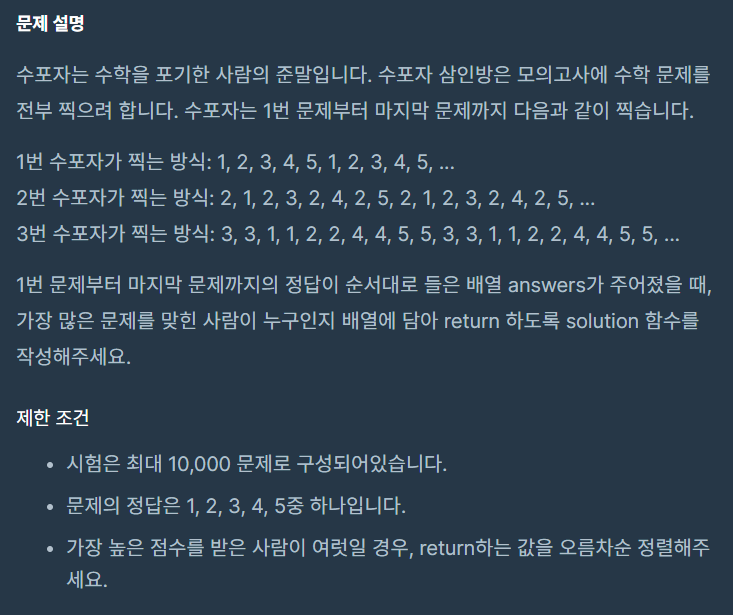

### 내 풀이

In [ ]:
def solution(answers):
    answer = []

    array_1 = [1, 2, 3, 4, 5] * 2000
    array_2 = [2, 1, 2, 3, 2, 4, 2, 5] * 1250
    array_3 = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5] * 1000
    array = [array_1, array_2, array_3]
    
    result = []
    for i in range(3):
        answer_num = 0
        for j in range(len(answers)):
            if array[i][j] == answers[j]:
                answer_num += 1
        result.append((answer_num, i))
        
    result.sort(key=lambda x : (-x[0], x[1]))
    answer_max = result[0][0]
    for a, b in result:
        if answer_max == a:
            answer.append(b + 1)
    
    return answer

### 상위 코드 1
- 내 코드랑 대체로 비슷

In [ ]:
def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result

### 상위 코드 2
- 배열이 일정하게 반복되는 것을 이용
- 리턴값을 깔끔하게 한줄로 가능

In [ ]:
def solution(answers):
    p = [[1, 2, 3, 4, 5],
         [2, 1, 2, 3, 2, 4, 2, 5],
         [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]]
    s = [0] * len(p)

    for q, a in enumerate(answers):
        for i, v in enumerate(p):
            if a == v[q % len(v)]:
                s[i] += 1
    return [i + 1 for i, v in enumerate(s) if v == max(s)]

## 5-2. 소수찾기

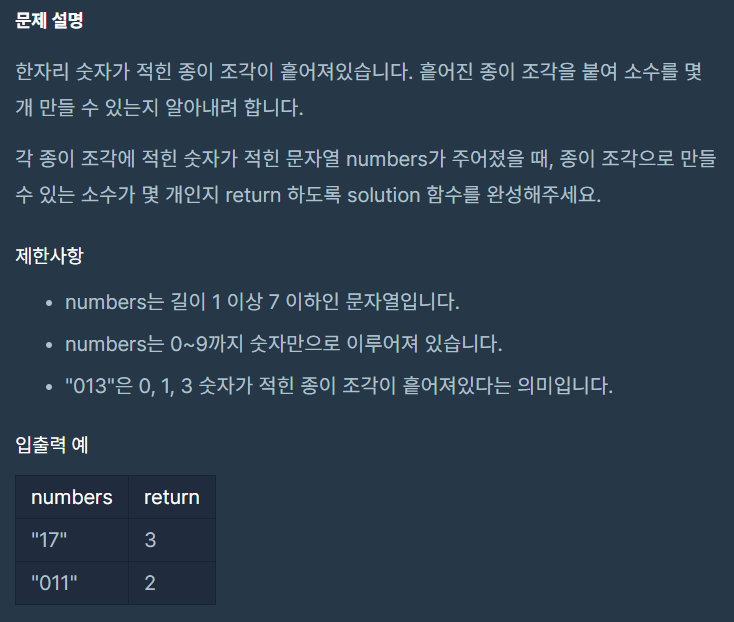

### 내 풀이
- 문자열 -> 숫자 -> 문자열 바꾸기 잘 생각해서 할 것..
- 순열로 일단 만들 수 있는 숫자들을 다 만든 후 set으로 중복 없앰
- 소수 판별 함수 기억할 것 

In [28]:
from itertools import permutations
import math

def solution(numbers):
    answer = 0
    candidates = []
    for j in range(1, 7):
        temp = list(permutations([i for i in numbers], j))
        candidates += set([int(''.join(temp[i])) for i in range(len(temp))])
    candidates = set(candidates)
    
    for x in candidates:
        if is_prime_number(int(x)):
            answer += 1
            
    return answer


def is_prime_number(x):
    if x in [0, 1]:
        return False
    else:
        for i in range(2, int(math.sqrt(x)) + 1):
            if x % i == 0:
                return False
    return True


### 상위 풀이 1
- set의 빼기 연산으로 에라토스테네스의 체 구현
- 이해 잘 안되니까 다시 .. 보기 .. 

In [ ]:
from itertools import permutations

def solution(n):
    a = set()
    for i in range(len(n)):
        a |= set(map(int, map("".join, permutations(list(n), i + 1))))
    
    a -= set(range(0, 2)) # 0, 1 제외 
    
    for i in range(2, int(max(a) ** 0.5) + 1):
        a -= set(range(i * 2, max(a) + 1, i))
    
    return len(a)

## 5-2. 카펫
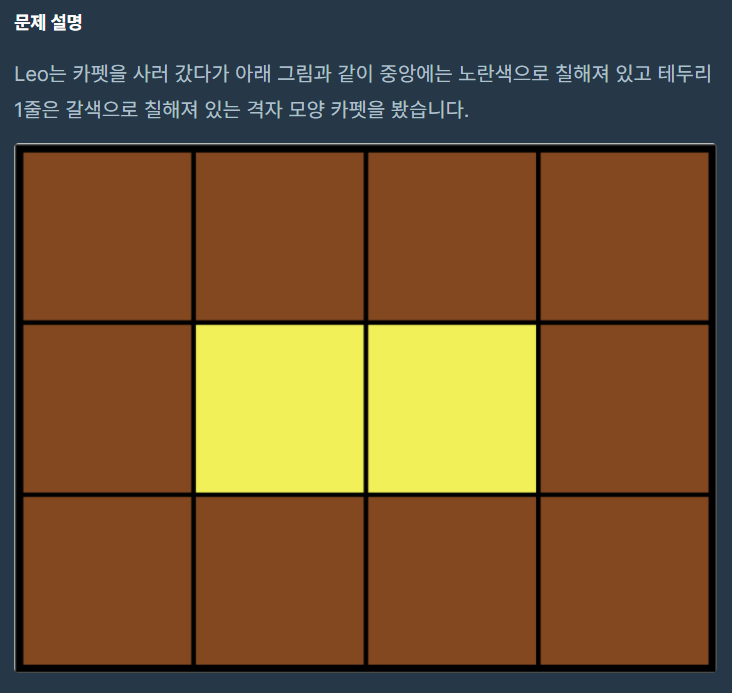

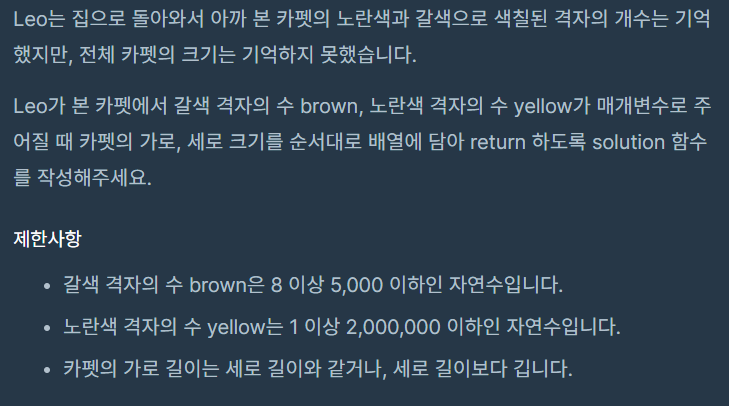

### 내 풀이
- 전체 격자 갯수를 구하고 가로, 세로는 그 약수의 곱임을 생각
- 가로, 세로 길이가 될 수 있는 후보들로 갈색 격자 수를 역으로 구해서 확인

In [ ]:
import math

def solution(brown, yellow):
    answer = []
    carpet_sum = brown + yellow
    
    candidates = []
    for i in range(2, int(math.sqrt(carpet_sum)) + 1):
        if carpet_sum % i == 0:
            candidates.append((carpet_sum // i, i))
            
    for x, y in candidates:
        if 2 * x + 2 * y - 4 == brown:
            answer = [x, y]
            break
    
    return answer

### 상위 코드 1
- 이해 안됨 .. ㅎㅎ

In [ ]:
def solution(brown, red):
    for i in range(1, int(red ** (1 / 2)) + 1):
        if red % i == 0:
            if 2 * (i + red // i) == brown - 4:
                return [red // i + 2, i + 2]

### 상위 코드 2
- 내꺼랑 비슷한데 나처럼 후보군을 다 구할 필요가 없음

In [ ]:
def solution(brown, red):
    nm = brown + red
    
    for n in range(1, nm + 1):
        if nm % n != 0: # 나누어 떨어지는 경우만 고려
            continue
        
        m = nm // n
        if (n - 2) * (m - 2) == red: # 빨간(노란) 격자 개수를 역으로 구해서 주어진 값과 같은지 확인
            return sorted([n, m], reverse = True)